# Introduction

Understanding systematic and statistical errors from the ABCD method is difficult. Currently, most analyses take several arbitrary control regions and use the worst of those control regions to determine the overal systematic error. We attempt to better understand how errors work in this work.

* We first show a simple run to become familiar with the standard method of error propagation used by most analyses.
* As we vary the area of the A plane, we show how the standard error propagation fairs as a function of the size of the region A.

The ABCD method is a two-variable background method. The two variables should be uncorrelated, and lay out a plane. A cut is made along each axis and that determines the regions A, B, C, and D. For this work, the layout of ABCD starts with A in the upper left, and then counts out region B in the upper right, C in the lower left, and D in the lower right. For this study it is assumed that the x and y variables are both 0 to 1.

# Configuration

We are using matplotlib to make plots. Allow them to appear inline.

In [1]:
%matplotlib inline

The code used to fill the ABCD plane is a small console program written in C#, which runs in parallel (to fill all your CPU's!), called ABCDTester. This is the relative location of the program that we can then run.

In [2]:
ABCDTesterPath="C:\\Users\\Gordon\\Documents\\Code\\ABCDStatTests\\ABCDTester\\bin\\Release\\ABCDTester.exe"

# Utilities

Make running the ABCDTester code easy from within this notebook

In [3]:
import os
import pandas as pd
def abcd_run(nevents = 100000, ntrials=20000, x_cut = 0.5, y_cut = 0.5):
    cmd = '%s --NEvents %d --NTrials %d --XCut %f --YCut %f > run.txt' % (ABCDTesterPath, nevents, ntrials, x_cut, y_cut)
    if os.system(cmd) != 0:
        raise RuntimeError ("Unable to run %s" % cmd)
    v = pd.read_csv("run.txt")
    os.unlink("run.txt")
    return v

We will be doing a bunch of Gaussian fitting, so make it easy (return A (normalization), mu (average), and sigma (width)

In [4]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy

def gauss(x, A, mu, sigma):
    # Fit function
    #A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

def fitGaus(data):
    # First, bin the data
    hist, bin_edges = numpy.histogram(data, density=False, bins='auto')
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2

    p0 = [1., data.mean(), 100.]
    coeff, var_matrix = curve_fit(gauss, bin_centers, hist, p0=p0)
    
    # Plot both the data and the curve
    hist_fit = gauss(bin_centers, *coeff)
    plt.plot(bin_centers, hist, label='Test data')
    plt.plot(bin_centers, hist_fit, label='Fitted data')
    plt.show()

    return coeff

# Simple Single Run

Run 10K trials with 100K events, with a cut in the middle so we can explore the output of the program

In [5]:
simple = abcd_run(nevents=100000, ntrials = 10000, x_cut = 0.5, y_cut = 0.5)

In [6]:
simple

,A,B,C,D,CalcA,CalcA StdDev
0,25114,24756,25130,25000,24884.731200,272.811257
1,25034,24921,24974,25071,24824.580352,272.002153
2,24924,24892,25161,25023,25029.277545,274.045824
3,25034,24911,25045,25010,24945.861455,273.330888
4,24906,25006,24927,25161,24773.441517,271.211592
5,24812,25075,24938,25175,24838.941410,271.758625
6,24916,24751,25196,25137,24809.094005,271.626433
7,25069,24932,24911,25088,24756.100606,271.315681
8,25265,24909,24810,25016,24703.881116,271.098366
9,25301,24956,24969,24774,25152.432550,276.087431


Since the event placement is done by a flat random number generator, we should expect a gaussian with with sqrt(N) for regions A...D. Lets look just at A.

In [7]:
simple.mean()

A               24999.954300
B               24998.679500
C               25000.806900
D               25000.559300
CalcA           24999.928157
CalcA StdDev      273.863996
dtype: float64

Note that the calculated A is the same as A itself on average. The StdDev column is the simple statistical error propagation of the relation BC/D (assuming all errors are sqrt(N) and guassian).

In [8]:
simple.std()

A               136.964061
B               138.073980
C               138.946035
D               137.213424
CalcA           263.888968
CalcA StdDev      2.856368
dtype: float64

In [9]:
import math
math.sqrt(simple.mean()['A'])

158.11373849226385

I do not understand why these are different.

Histogram and fit these

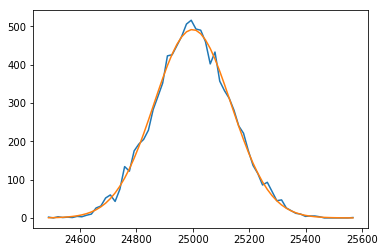

array([   491.78013707,  24998.86946909,    136.48064406])

In [10]:
fitGaus(simple['A'])

Look at the difference between A and the calculated A.

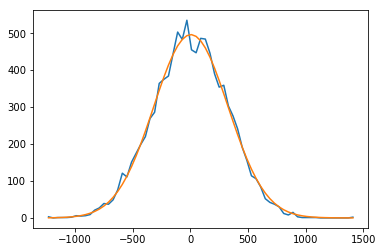

array([ 496.16840376,    5.78160446,  322.41547649])

In [11]:
fitGaus(simple['A']-simple['CalcA'])

The 311 width here should be compared to the mean of the calculated standard deveation above (273 when I ran this). Do not know what is at the root of the discrepancy here.